# Introducción al aprendizaje automatizado - TP 3
## Autora: Aldana Zarate
### Ejercicio 1

# Imports y funciones auxiliares


In [3]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from copy import deepcopy
import matplotlib.pyplot as plt
import tp0
import random
import tp1ej4
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
import redes_utils
import sklearn as sk
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB

# Ejercicio 1

Text(0, 0.5, 'Error')

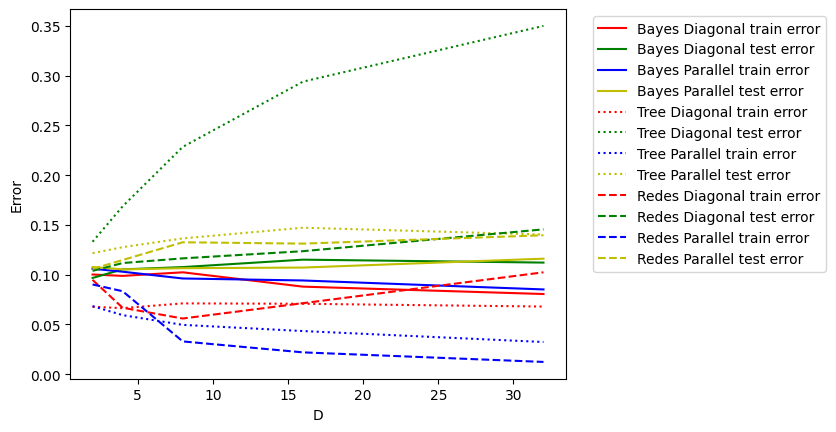

In [5]:
# Valores de d
d_iterable = [2, 4, 8, 16, 32]

# Datos a guardar pedidos
train_errors_d = []
test_errors_d = []

train_errors_p = []
test_errors_p = []

# Guardo la dimension que va teniendo d para poder armar el dataframe a la hora de analizar
dimensions = []

for d in d_iterable:
    # Conjuntos de test
    # Diagonal
    d_test = tp0.generate_dataframe_ej_a(d, 10000, 0.78)
    cols = range(0, d)
    X_d_test = d_test[cols]
    y_d_test = d_test['Clase']

    # Paralelo
    p_test = tp0.generate_dataframe_ej_b(d, 10000, 0.78)
    X_p_test = p_test[cols]
    y_p_test = p_test['Clase']
    
    for i in range(0,20):
        # Longitud del conjunto de entrenamiento
        dimensions.append(d)

        # Conjuntos de entrenamiento diagonal
        train_set_d = tp0.generate_dataframe_ej_a(d, 250, 0.78)
        X_d_train = train_set_d[cols]
        y_d_train = train_set_d['Clase']

        # Conjuntos de entrenamiento paralelo
        train_set_p = tp0.generate_dataframe_ej_b(d, 250, 0.78)
        X_p_train = train_set_p[cols]
        y_p_train = train_set_p['Clase']

        # Modelos y entrenamiento diagonal
        clf_d = GaussianNB()
        clf_d.fit(X_d_train, y_d_train)

        # Modelos y entrenamiento paralelo
        clf_p = GaussianNB()
        clf_p.fit(X_p_train, y_p_train)

        # Probamos sobre los conjuntos de testeo
        predicted_d = clf_d.predict(d_test[cols])
        predicted_p = clf_p.predict(p_test[cols])

        # Guardamos errores sobre el conjunto de entrenamiento y de testeo.
        # Error = 1 - accuracy
        train_errors_d.append(1 - accuracy_score(y_d_train, clf_d.predict(X_d_train)))
        test_errors_d.append(1 - accuracy_score(y_d_test, predicted_d))

        train_errors_p.append(1 - accuracy_score(y_p_train, clf_p.predict(X_p_train)))
        test_errors_p.append(1 - accuracy_score(y_p_test, predicted_p))

# Armo dataframe con los datos colectados anteriormente
temp_dataframe_d = pd.DataFrame({})
temp_dataframe_d['D'] = dimensions
temp_dataframe_d['TrainError'] = train_errors_d
temp_dataframe_d['TestError'] = test_errors_d

temp_dataframe_p = pd.DataFrame({})
temp_dataframe_p['D'] = dimensions
temp_dataframe_p['TrainError'] = train_errors_p
temp_dataframe_p['TestError'] = test_errors_p

# Dataframes finales a usar para la gráfica
df_errors_d = pd.DataFrame({})
df_errors_d['Dimension'] = d_iterable
df_errors_d['TrainError'] = temp_dataframe_d.groupby('D')['TrainError'].mean().to_numpy()
df_errors_d['TestError'] = temp_dataframe_d.groupby('D')['TestError'].mean().to_numpy()

df_errors_p = pd.DataFrame({})
df_errors_p['Dimension'] = d_iterable
df_errors_p['TrainError'] = temp_dataframe_p.groupby('D')['TrainError'].mean().to_numpy()
df_errors_p['TestError'] = temp_dataframe_p.groupby('D')['TestError'].mean().to_numpy()

path = 'datos_errores_redes_d.csv'
datos_errores_redes_d = pd.read_csv(path)
datos_errores_redes_d = datos_errores_redes_d.drop('Unnamed: 0', axis=1)

path = 'datos_errores_redes_p.csv'
datos_errores_redes_p = pd.read_csv(path)
datos_errores_redes_p = datos_errores_redes_p.drop('Unnamed: 0', axis=1)

tree_df_errors_d, tree_df_errors_p = tp1ej4.obtainTreesData()

plt.plot(df_errors_d['Dimension'], df_errors_d['TrainError'], 'r')
plt.plot(df_errors_d['Dimension'], df_errors_d['TestError'], 'g')
plt.plot(df_errors_p['Dimension'], df_errors_p['TrainError'], 'b')
plt.plot(df_errors_p['Dimension'], df_errors_p['TestError'], 'y')
plt.plot(tree_df_errors_d['Dimension'], tree_df_errors_d['TrainError'], 'r', linestyle="dotted")
plt.plot(tree_df_errors_d['Dimension'], tree_df_errors_d['TestError'], 'g', linestyle="dotted")
plt.plot(tree_df_errors_p['Dimension'], tree_df_errors_p['TrainError'], 'b', linestyle="dotted")
plt.plot(tree_df_errors_p['Dimension'], tree_df_errors_p['TestError'], 'y', linestyle="dotted")
plt.plot(datos_errores_redes_d['Dimension'], datos_errores_redes_d['TrainError'], 'r', linestyle="dashed")
plt.plot(datos_errores_redes_d['Dimension'], datos_errores_redes_d['TestError'], 'g',linestyle="dashed")
plt.plot(datos_errores_redes_p['Dimension'], datos_errores_redes_p['TrainError'], 'b', linestyle="dashed")
plt.plot(datos_errores_redes_p['Dimension'], datos_errores_redes_p['TestError'], 'y', linestyle="dashed")
plt.legend(['Bayes Diagonal train error', 'Bayes Diagonal test error', 'Bayes Parallel train error', 'Bayes Parallel test error',
            'Tree Diagonal train error', 'Tree Diagonal test error', 'Tree Parallel train error', 'Tree Parallel test error',
            'Redes Diagonal train error', 'Redes Diagonal test error', 'Redes Parallel train error', 'Redes Parallel test error'],
            bbox_to_anchor=(1.04,1), ncol=1)
plt.xlabel("D")
plt.ylabel("Error")

Si comparamos los errores de test, se puede observar que los correspondientes a Bayes son los más bajos de todos. Para el caso de training, esto no es tan así ya que por el contrario es de los más altos.

Como los datos que estamos trabajando están generados con gaussianas y a través de este modelo los estamos estudiando a su vez también con gaussianas, tiene sentido que los errores en test sean tan bajos. Sin embargo, sí se observa que a medida que crecen las dimensiones el error de test crece levemente.

# Ejercicio 2
## Dos-elipses

Nota: no guardé la mejor red en ningun medio no-volátil cuando hice el tp de redes, así que voy a volver a entrenar una con los valores óptimos encontrados en su momento (momentum 0.9 y learning rate 0.1) para que no tarde tantas hrs dicho entrenamiento nuevamente.

### Redes neuronales


In [ ]:
patrones = 500
patrones_train = 400
patrones_val = 100
patrones_test = 2000

col_names = ['x','y','Clase']
df_data = pd.read_csv('dos_elipses.data', names=col_names)

sample_df_data = df_data.sample(n = patrones)
X_train, X_val, y_train, y_val = train_test_split(sample_df_data[['x','y']], sample_df_data['Clase'], test_size = 100, train_size = 400, random_state=0)

df_test = pd.read_csv('dos_elipses.test', names=col_names)  # el csv tiene 2000 justo asi que no es necesario samplearlo

neuronas = 6
evaluaciones = 300
epocas = 50
momentum = 0.9 # alfa
learning_rate = 0.1 # eta
entrenamientos = 10

red = MLPClassifier(hidden_layer_sizes=(neuronas,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', 
                    learning_rate_init=learning_rate, momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)
best_red, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error = \
redes_utils.entrenar_red(red, evaluaciones, X_train, y_train, X_val, y_val, df_test[['x','y']], df_test['Clase'], sk.metrics.zero_one_loss)

y_pred_redes = best_red.predict(df_test[['x','y']])

datos_dos_elipses_redes = {'x': df_test['x'], 'y': df_test['y'], 'Prediction': y_pred_redes}
df = pd.DataFrame(datos_dos_elipses_redes)
df.to_csv('ej2/datos_dos_elipses_redes.csv')
#files.download('datos_dos_elipses_redes.csv')



### Bayes


In [9]:
patrones = 500
patrones_train = 400
patrones_val = 100
patrones_test = 2000

col_names = ['x','y','Clase']
df_data = pd.read_csv('dos_elipses.data', names=col_names)

sample_df_data = df_data.sample(n = patrones)
X_train, X_val, y_train, y_val = train_test_split(sample_df_data[['x','y']], sample_df_data['Clase'], test_size = 100, train_size = 400, random_state=0)

df_test = pd.read_csv('dos_elipses.test', names=col_names)  # el csv tiene 2000 justo asi que no es necesario samplearlo

clasif_b = GaussianNB()

clasif_b.fit(X_train, y_train)
y_pred_bayes = clasif_b.predict(df_test[['x','y']])

### Análisis redes vs Bayes


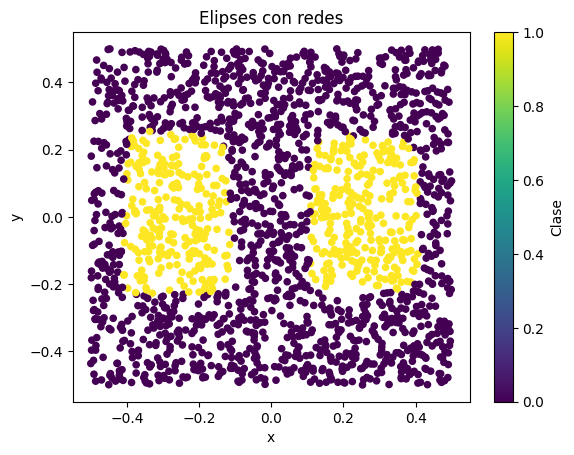

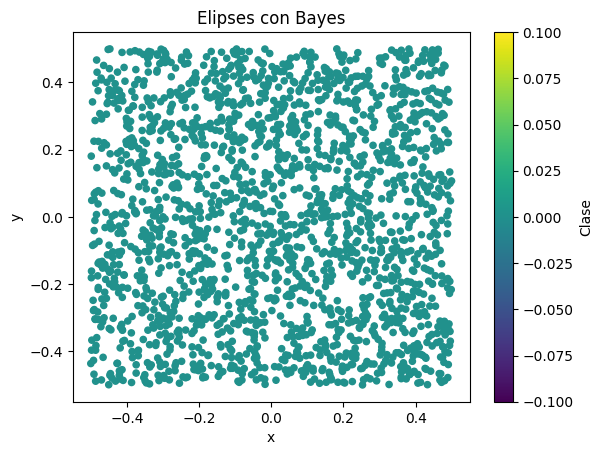

In [8]:
# Redes
datos_tabla = pd.read_csv('ej2/datos_dos_elipses_redes.csv')
datos_tabla = datos_tabla.drop('Unnamed: 0', axis=1)
redes_utils.graficar_predicciones(datos_tabla[['x','y']], datos_tabla['Prediction'], "Elipses con redes")

# Bayes
redes_utils.graficar_predicciones(df_test[['x','y']], y_pred_bayes, "Elipses con Bayes")

Podemos observar que con redes se obtiene una muy buena predicción, mientras que con bayes el modelo siempre predice a todos los puntos como clase 0. Esto es debido a que como hay mayor representación (es decir, más cantidad de puntos) de esa clase, hay «mayor probabilidad» de que sea clase 0 y por eso el modelo de Bayes predice eso en todas las ejecuciones de entrenamiento. Esta predominancia de la clase 0, en mi caso, hace que ni aparezcan los "datos aportados" de la gaussiana de la clase 0.

## Espirales anidadas

### Redes neuronales

In [ ]:
# Número de neuronas
n = 40

# Params
lr = 0.1
momentum = 0.9
evaluaciones = 1000
epocas = 20

# Datos para ajustar los modelos
random.seed()
train_data = tp0.generate_random_spirals(600)
train_samples = train_data[['x','y']]
train_target = train_data['Clase']
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_target, test_size=0.2, random_state=0)

# Datos para test
test_data = tp0.generate_random_spirals(2000)

clasif = MLPClassifier(hidden_layer_sizes=(n,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant',
                        learning_rate_init=lr, momentum=momentum,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas)

best_red, train_errors, val_errors, test_errors, best_train_error, best_val_error, best_test_error = \
redes_utils.entrenar_red(clasif, evaluaciones, X_train, y_train, X_val, y_val, test_data[['x','y']], test_data['Clase'], sk.metrics.zero_one_loss)

y_test_preds_redes = best_red.predict(test_data[['x','y']])
datos_espirales_anidadas_redes = {'x': test_data['x'], 'y': test_data['y'], 'Prediction': y_test_preds_redes}
df = pd.DataFrame(datos_espirales_anidadas_redes)
df.to_csv('ej2/datos_espirales_anidadas_redes.csv')
#files.download('datos_espirales_anidadas_redes.csv')

### Bayes

In [11]:
# Datos para ajustar los modelos
random.seed()
train_data = tp0.generate_random_spirals(600)
train_samples = train_data[['x','y']]
train_target = train_data['Clase']
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_target, test_size=0.2, random_state=0)

# Datos para test
test_data = tp0.generate_random_spirals(2000)

clasif_bayes = GaussianNB()

clasif_bayes.fit(X_train, y_train)
y_pred_bayes = clasif_bayes.predict(test_data[['x','y']])

### Análisis redes vs Bayes


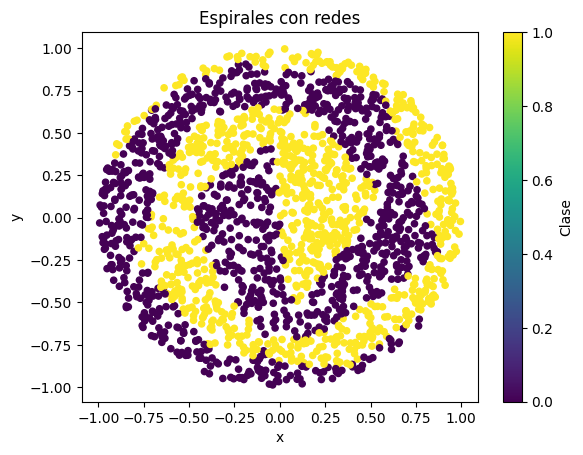

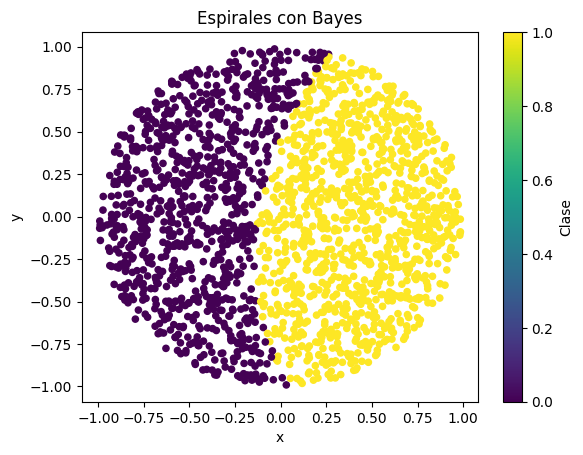

In [13]:
# Redes
datos_tabla = pd.read_csv('ej2/datos_espirales_anidadas_redes.csv')
datos_tabla = datos_tabla.drop('Unnamed: 0', axis=1)
redes_utils.graficar_predicciones(datos_tabla[['x','y']], datos_tabla['Prediction'], "Espirales con redes")

# Bayes
redes_utils.graficar_predicciones(test_data[['x','y']], y_pred_bayes, "Espirales con Bayes")

En el tp anterior ya habíamos observado que con redes el resultado no era demasiado bueno (inclusive con la mayor cantidad de neuronas posibles dentro del rango a usar). En este ejercicio dejé las predicciones de una segunda corrida que realicé, ya que con la primera me habían dado resultados bastante feos.

Usando el modelo de Bayes, se obtiene una predicción bastante lejana a la real. A diferencia del ejercicio de las elipses, ahora con las espirales tenemos igual representación de las clases, por eso tiene sentido que la gráfica sea un círculo dividido 2. Que a la izquierda esté el violeta supongo que es por la distribución particular que tuvieron los datos de entrenamiento, siendo que del lado izquierdo seguro arrancaba con una espiral violeta.

# Ejercicio 3
Nota: como el clasificador y el discretizador se crean en función del nro de bines y esto va a ir variando para encontrar el nro de bines óptimo, los voy a sacar del prototipo de la función como sugiere el enunciado.

In [1]:
def entrenar_nb(X_train, y_train, X_val, y_val, X_test, y_test, nbins):
    best_clf_nb = None
    best_discretizador = None
    best_nbin = None
    train_errors = []
    val_errors = []
    test_errors = []

    best_val_error = None

    for nbin in nbins:
        discretizador = KBinsDiscretizer(n_bins=nbin, encode='ordinal', strategy='uniform')
        discretizador.fit(X_train)

        dX_train = discretizador.transform(X_train)
        dX_val = discretizador.transform(X_val)
        dX_test = discretizador.transform(X_test)

        clf_nb = CategoricalNB(min_categories=nbin)
        clf_nb.fit(dX_train, y_train)

        # Medimos y guardamos los errores
        train_errors.append(1 - accuracy_score(clf_nb.predict(dX_train), y_train))
        val_error_nbin = 1 - accuracy_score(clf_nb.predict(dX_val), y_val)
        val_errors.append(val_error_nbin)
        test_errors.append(1 - accuracy_score(clf_nb.predict(dX_test), y_test))

        # Chequeo si el clasigficador es mejor que el candidato
        if best_val_error is None or val_error_nbin < best_val_error:
            best_val_error = val_error_nbin
            best_clf_nb = deepcopy(clf_nb)
            best_discretizador = deepcopy(discretizador)
            best_nbin = nbin 

    return train_errors, val_errors, test_errors, best_discretizador, best_clf_nb

# Ejercicio 4

## Dos-elipses


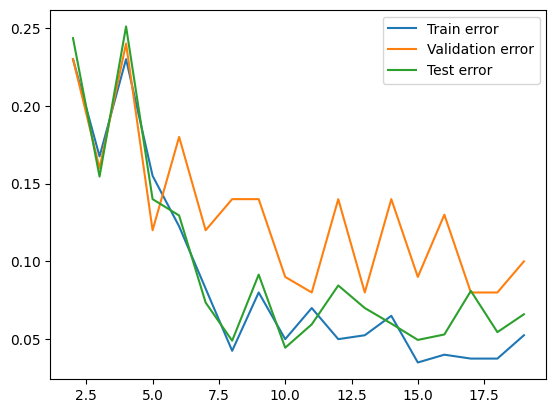

In [4]:
patrones = 500
patrones_train = 400
patrones_val = 100
patrones_test = 2000

col_names = ['x','y','Clase']
df_data = pd.read_csv('dos_elipses.data', names=col_names)

sample_df_data = df_data.sample(n = patrones)
X_train, X_val, y_train, y_val = train_test_split(sample_df_data[['x','y']], sample_df_data['Clase'], test_size = 100, train_size = 400, random_state=0)

df_test = pd.read_csv('dos_elipses.test', names=col_names)  # el csv tiene 2000 justo asi que no es necesario samplearlo

nbins = list(range(2,20))

train_errors_elipses, val_errors_elipses, test_errors_elipses, b_discr, b_clf_nb = entrenar_nb(X_train, y_train, X_val, y_val, df_test[['x','y']], df_test['Clase'], nbins)

plt.plot(nbins, train_errors_elipses, label = 'Train error')
plt.plot(nbins, val_errors_elipses, label = 'Validation error')
plt.plot(nbins, test_errors_elipses, label = 'Test error')
plt.legend()

Se puede observar en la gráfica que si miramos en general, a medida que aumentamos la cantidad de bines los errores tienden a decrecer; pero lo hacen de manera muy irregular ya que se observan varios "picos" a lo largo de todas las curvas de error. Con respecto al sobreajuste, se observa que a medida que se aumenta la cantidad de bines, las curvas se separan más entre sí. Entre las curvas de errores de train y test no diría que sobreajusta por los errores que se observan, pero sí creo que la curva de validación se separa bastante de la de train.



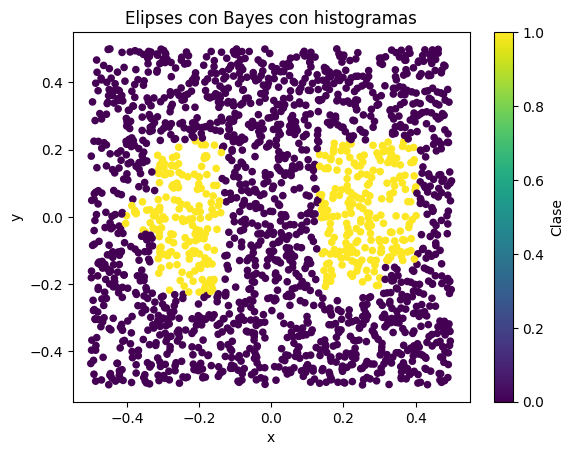

In [5]:
dX_test = b_discr.transform(df_test[['x','y']])
y_pred = b_clf_nb.predict(dX_test)

redes_utils.graficar_predicciones(df_test[['x','y']], y_pred, "Elipses con Bayes con histogramas")

Notamos una mejoría bastante notoria con este modelo comparándolo con el ejercicio 2), dado que en este caso se pueden observar de manera bastante aceptable ambas elipses.

## Espirales anidadas

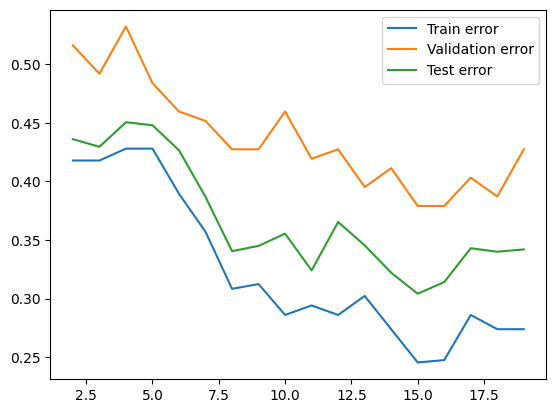

In [6]:
# Datos para ajustar los modelos
random.seed()
train_data = tp0.generate_random_spirals(600)
train_samples = train_data[['x','y']]
train_target = train_data['Clase']
X_train, X_val, y_train, y_val = train_test_split(train_samples, train_target, test_size=0.2, random_state=0)

# Datos para test
test_data = tp0.generate_random_spirals(2000)

nbins = list(range(2,20))

train_errors_espirales, val_errors_espirales, test_errors_espirales, b_discr, b_clf_nb = entrenar_nb(X_train, y_train, X_val, y_val, test_data[['x','y']], test_data['Clase'], nbins)

plt.plot(nbins, train_errors_espirales, label = 'Train error')
plt.plot(nbins, val_errors_espirales, label = 'Validation error')
plt.plot(nbins, test_errors_espirales, label = 'Test error')
plt.legend()

Para este caso, se observan errores muchísimo más altos que en el caso de las elipses. La misma tendencia «particular» de que el error decrezca de cierta manera a medida que se aumentan los bines prevalece, pero siguen siendo muy altos los errores a pesar de esto. 
Con respecto al sobreajuste, quizás aquí se puede observar un poco más pero tampoco demasiado en mi opinión, ya que la curva de error de test no se separa demasiado de la de train en ningún momento. Para los últimos bines sí se puede observar que la curva de error de validación se dispara mientras que las otras 2 quedan planas.

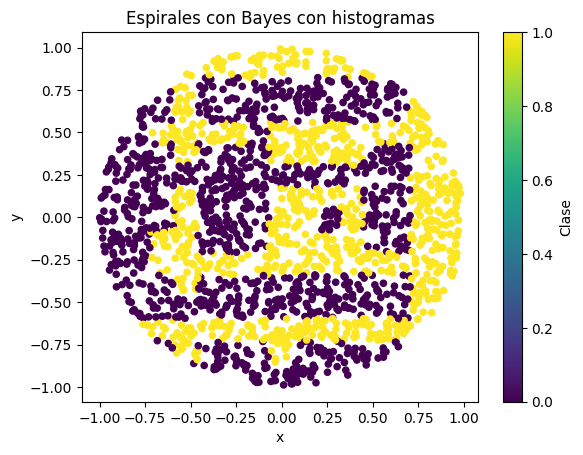

In [7]:
dX_test = b_discr.transform(test_data[['x','y']])
y_pred = b_clf_nb.predict(dX_test)

redes_utils.graficar_predicciones(test_data[['x','y']], y_pred, "Espirales con Bayes con histogramas")

Se observa una muy pequeña mejora con respecto al ejercicio 2 si se quiere, pero lejos está de parecerse a las espirales esperadas. Quizás tenga que ver con que en el problema de las elipses, puedo sectorizar mejor las probabilidades por la naturaleza de los datos, mientras que con las espirales esto no es posible. 

# Ejercicio 5